# PANDAS

https://drive.google.com/file/d/1kxL9pgdacShmHZc-_Q_POg6bsvA2vPDq/view?usp=sharing

In [2]:
import pandas as pd
df = pd.read_csv('Mobile price New - Mobile price New.csv')
df.head()

C:\Users\thilks\AppData\Local\Temp\ipykernel_45656\1838754048.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,"2,549.00",9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,"2,631.00",17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,"2,603.00",11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,"2,769.00",16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,"1,411.00",8,2,15,1,1,0,1.0


# What is the shape of the dataset?


In [3]:
import numpy as np

data_shape = np.shape(df)
size = np.size(df)
print("Number of rows:", data_shape[0])
print("Number of columns:", data_shape[1])
print(size)

Number of rows: 2001
Number of columns: 21
42021


# What are the data types of each column?`

In [4]:
df.dtypes

battery_power     object
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt         object
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

# Are there any missing values in the dataset?

In [5]:
df.isnull().sum()

battery_power    2
blue             1
clock_speed      3
dual_sim         1
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        1
n_cores          0
pc               1
px_height        1
px_width         2
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      2
dtype: int64

# How many unique values are there in the "mobile_wt" column?`

In [22]:
uni_val = df['mobile_wt'].unique()
count = len(uni_val)

print(count)
# print(uni_val)

123


In [6]:
import pandas as pd

df['mobile_wt'] = pd.to_numeric(df['mobile_wt'], errors='coerce')

df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)

df['mobile_wt'].astype(float)
uni_val = df['mobile_wt'].nunique()
print(uni_val)


122


C:\Users\thilks\AppData\Local\Temp\ipykernel_45656\3024081075.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)


# What is the average battery power of the mobile phones in the dataset?

In [12]:
df['battery_power'] = pd.to_numeric(df['battery_power'], errors= 'coerce')
df['battery_power'].fillna(df['battery_power'].mean())
avg =df['battery_power'].mean()
print(avg)

1238.4436654982474


# What is the distribution of battery power in the dataset?

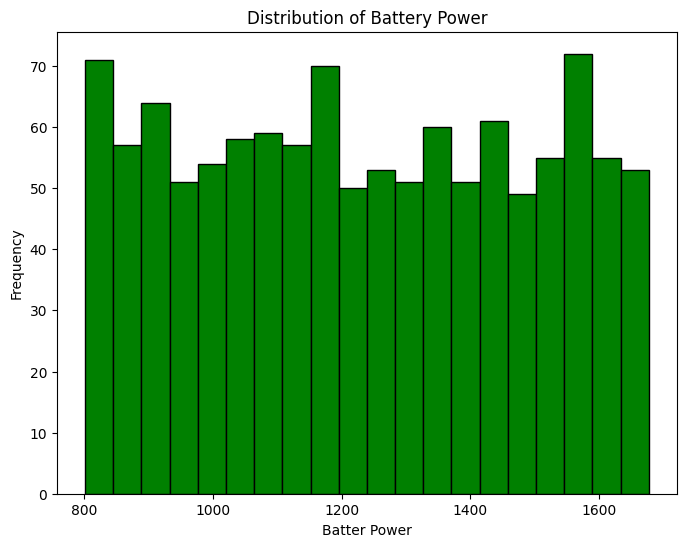

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv('Mobile price New - Mobile price New.csv')

df['battery_power'] = pd.to_numeric(df['battery_power'], errors= 'coerce')
df['battery_power'].fillna(df['battery_power'].mean())


mean = df['battery_power'].mean()
std = df['battery_power'].std()
filtered_df = df[(df['battery_power'] >= mean - std) & 
                 (df['battery_power'] <= mean + std)]

# Plot
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['battery_power'], bins=20, color='green',edgecolor = 'black')
plt.title('Distribution of Battery Power')
plt.xlabel('Batter Power')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Density'>

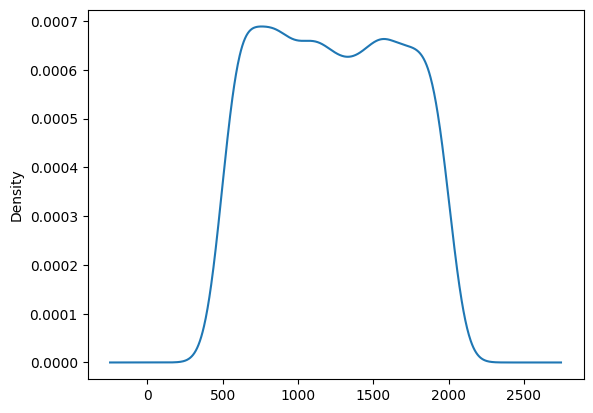

In [10]:
df['battery_power'].plot.density()

In [69]:
df[(df['battery_power'] >= (df['battery_power'].mean() - df['battery_power'].std())) & 
   (df['battery_power'] <= (df['battery_power'].mean() + df['battery_power'].std()))]['battery_power'].count()/len(df['battery_power'])

0.5752123938030984

# How many mobile phones have a dual sim support?

In [35]:

dual_sim = df[df['dual_sim'] == 1]
count = len(dual_sim)
print(count)

1019


# What is the maximum and minimum internal memory in the dataset?

In [39]:
maximum = df['int_memory'].max()
print("Maximum Internal memory:")
print(maximum)
minimum = df['int_memory'].min()
print("Minimum Internal memory:")
print(minimum)

Maximum Internal memory:
64.0
Minimum Internal memory:
2.0


# What is the distribution of internal memory in the dataset?

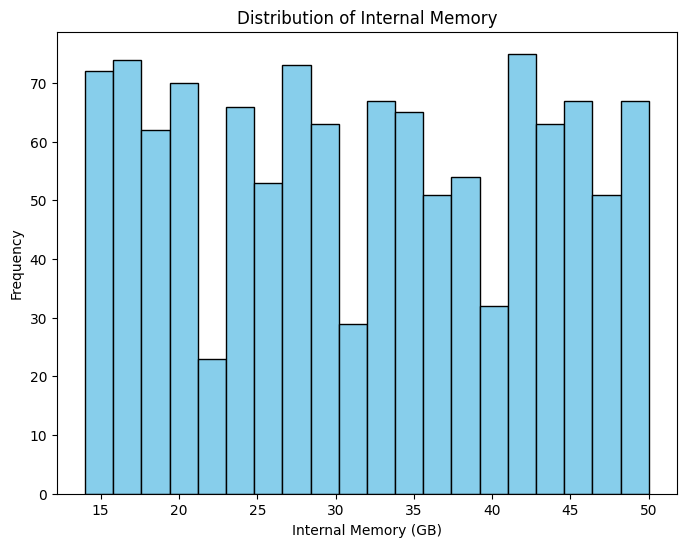

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mobile price New - Mobile price New.csv')


mean_int_memory = df['int_memory'].mean()
std_int_memory = df['int_memory'].std()
filtered_df = df[(df['int_memory'] >= mean_int_memory - std_int_memory) & 
                 (df['int_memory'] <= mean_int_memory + std_int_memory)]

# Plot
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['int_memory'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.show()


<Axes: ylabel='Density'>

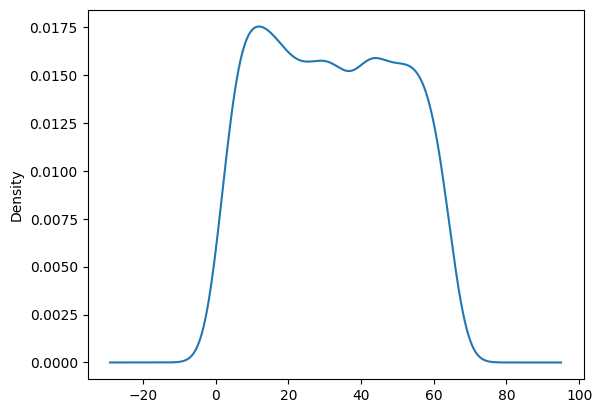

In [3]:
df['int_memory'].plot.density()

In [4]:
One_std_deviation = df[(df['int_memory'] >= (df['int_memory'].mean() - df['int_memory'].std())) & 
   (df['int_memory'] <= (df['int_memory'].mean() + df['int_memory'].std()))]['int_memory'].count()/len(df['int_memory'])

print(One_std_deviation)

0.5882058970514743


# How many mobile phones have 4G support?

In [41]:
FourG = df[df['four_g']==1]
print(len(FourG))

1044


# What is the average weight of mobile phones in the dataset?

In [14]:
weight_avg = df['mobile_wt'].mean()
print(weight_avg)

140.2626313156578


# What is the maximum and minimum RAM size in the dataset?

In [51]:
import pandas as pd
df = pd.read_csv('Mobile price New - Mobile price New.csv')

df['ram'] = df['ram'].str.replace('"','')

df['ram'] = df['ram'].str.replace(',','')
df['ram'] = pd.to_numeric(df['ram'],errors= 'coerce')
df.dropna(subset=['ram'])

maximum = df['ram'].max()
minimum = df['ram'].min()

print(len(df['ram']))

print(maximum)
print(minimum)

print(df['ram'])

2001
3998.0
256.0
0       2549.0
1       2631.0
2       2603.0
3       2769.0
4       1411.0
         ...  
1996     668.0
1997    2032.0
1998    3057.0
1999     869.0
2000    3919.0
Name: ram, Length: 2001, dtype: float64


# How many mobile phones have a touch screen and 4G support?

In [20]:
Mob_4g = df[(df['touch_screen']==1) & (df['four_g']==1)]
print(len(Mob_4g))

533


# What is the average internal memory capacity of mobile phones with 4G support and  a primary camera quality of 8 megapixels or higher?

In [21]:
conditions = df[(df['pc']<=8) & (df['four_g']==1)]
Avg_int = conditions['int_memory'].mean()
print(Avg_int)

33.199551569506724


# Which mobile phone has the highest RAM size and what are its other specifications?


In [52]:
Highest_ram = df['ram'].idxmax()
Specs = df.loc[Highest_ram]
print(Highest_ram)
print(Specs)



941
battery_power      1456
blue                0.0
clock_speed         1.6
dual_sim            1.0
fc                    9
four_g                1
int_memory         39.0
m_dep               0.1
mobile_wt            80
n_cores               8
pc                 10.0
px_height         815.0
px_width           1666
ram              3998.0
sc_h                  6
sc_w                  3
talk_time            13
three_g               1
touch_screen          1
wifi                  0
price_range         3.0
Name: 941, dtype: object


# What is the distribution of battery power for mobile phones with a weight between 150 and 200 grams?


C:\Users\thilks\AppData\Local\Temp\ipykernel_12240\3098588250.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)


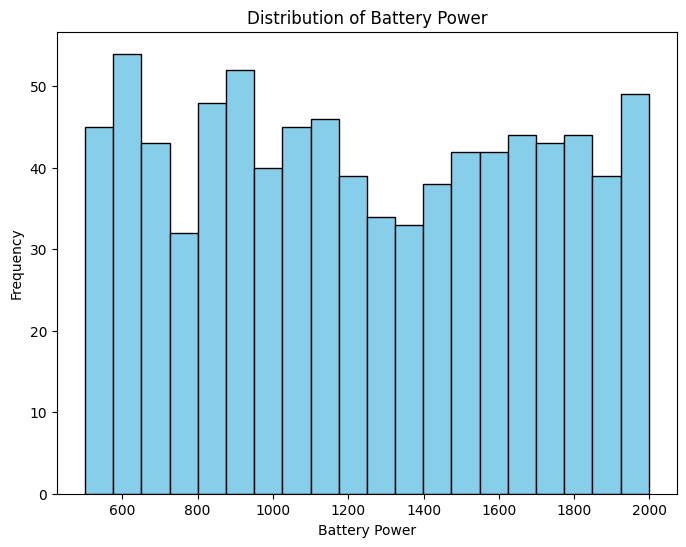

In [14]:
df['battery_power'] = pd.to_numeric(df['battery_power'], errors= 'coerce')
df['battery_power'].fillna(df['battery_power'].mean())


df['mobile_wt'] = pd.to_numeric(df['mobile_wt'], errors='coerce')
df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)

filtered_df = df[(df['mobile_wt'] >= 150) & (df['mobile_wt'] <= 200)]


battery_power_values = filtered_df['battery_power']

# Plot 
plt.figure(figsize=(8, 6))
plt.hist(battery_power_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')

plt.show()

<Axes: ylabel='Density'>

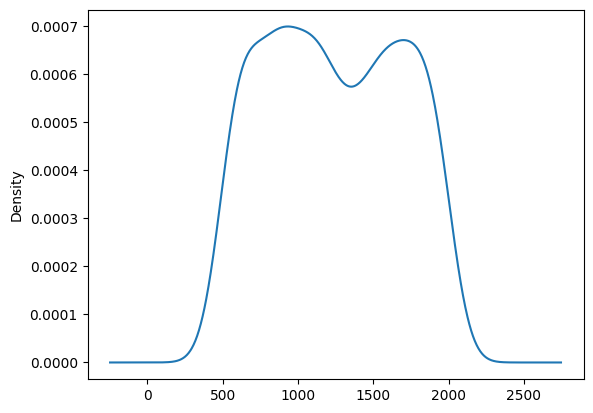

In [15]:
battery_power_values.plot.density()

# How many mobile phones have a primary camera quality of 8 megapixels or higher and a touch screen?

In [24]:
conditions = df[(df['pc']<=8) & (df['four_g']==1)]
print(len(conditions))

446


# What is the average weight of mobile phones with 4G support and a touch screen?

In [25]:
phone = df[(df['four_g']==1) & (df['touch_screen']==1)]
avg_wt = phone['mobile_wt'].mean()
print(avg_wt)

138.8799249530957


# How many mobile phones have a battery power greater than 3000 mAh and a talk time greater than 20 hours?

In [27]:
mobile_battery = df[(df['battery_power']<= 3000) & (df['talk_time']<=20)]
print(len(mobile_battery))

1997


# Which mobile phone has the highest primary camera quality and what are its other specifications?

In [53]:
Highest_pc = df['pc'].idxmax()
Specs = df.loc[Highest_pc]
print(Highest_ram)
print(Specs)

941
battery_power      1602
blue                1.0
clock_speed         2.8
dual_sim            1.0
fc                    4
four_g                1
int_memory         38.0
m_dep               0.7
mobile_wt           114
n_cores               3
pc                 20.0
px_height         466.0
px_width            788
ram              1037.0
sc_h                  8
sc_w                  7
talk_time            20
three_g               1
touch_screen          0
wifi                  0
price_range         0.0
Name: 23, dtype: object


# How many mobile phones have a battery power greater than the average battery power of all mobile phones in the dataset and a primary camera quality of 10 megapixels or higher?

In [56]:
df['battery_power'] = pd.to_numeric(df['battery_power'], errors= 'coerce')
df['battery_power'].fillna(df['battery_power'].mean())

average_battery_power = df['battery_power'].mean()

above_avg_battery = df[(df['battery_power'] > average_battery_power) & (df['pc'] >= 10)]
count = len(above_avg_battery)

print(count)

507


# Is there a correlation between battery power and screen size?

In [58]:
corr = df['battery_power'].corr(df['sc_h'] * df['sc_w'])
print(corr)


-0.024088397428738823


# How does the number of processor cores affect the battery life of mobile phones?

In [68]:
corr = df['battery_power'].corr(df['n_cores'])
print(corr)

-0.0313336074018575


# Is there a relationship between the weight of a mobile phone and the quality of its primary camera?

In [64]:
df['mobile_wt'] = pd.to_numeric(df['mobile_wt'], errors='coerce')

df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)

df['mobile_wt'].astype(float)
corr = df[['mobile_wt', 'pc']].corr()

print(corr)


           mobile_wt        pc
mobile_wt   1.000000  0.017766
pc          0.017766  1.000000


C:\Users\thilks\AppData\Local\Temp\ipykernel_45656\1145233643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mobile_wt'].fillna(df['mobile_wt'].mean(),inplace = True)
